In [2]:
import os 
import sys
import numpy as np

current_path = os.getcwd()
parent_path = os.path.dirname(current_path)
sys.path.insert(0, parent_path)


In [3]:
import os
import sys

# Step 1: Get the parent directory of your current working directory
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))

# Step 2: Add project root to sys.path if not already present
if project_root not in sys.path:
    sys.path.insert(0, project_root)

# Step 3: Confirm
print("Project root added to sys.path:", project_root in sys.path)
print("scripts.read readable:", os.path.exists(os.path.join(project_root, "scripts", "read.py")))
print("scripts.financial_analyzer readable:", os.path.exists(os.path.join(project_root, "scripts", "financial_analyzer.py")))


Project root added to sys.path: True
scripts.read readable: True
scripts.financial_analyzer readable: True


In [4]:


file_path = "../data/raw_analyst_ratings.csv"


In [5]:
from scripts.read import read

In [6]:
news_data = read(file_path)
news_data.head()

File successfully loaded: ../data/raw_analyst_ratings.csv


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [19]:
news_data.isnull().sum()

Unnamed: 0    0
headline      0
url           0
publisher     0
date          0
stock         0
dtype: int64

In [20]:
headline_lengths = news_data['headline'].apply(len)
headline_lengths.head(15)

0      39
1      42
2      29
3      44
4      87
5      71
6      73
7     120
8      84
9      42
10     47
11     84
12     49
13    120
14     94
Name: headline, dtype: int64

Find Mean, Median, Mode, Minimum and Maximum of News data headline


In [23]:
import numpy as np

In [25]:
np.round(headline_lengths.describe(),3) 

count    1407328.000
mean          73.121
std           40.735
min            3.000
25%           47.000
50%           64.000
75%           87.000
max          512.000
Name: headline, dtype: float64

Number of published articles in specific date


In [27]:
publisher_date_counts = news_data['date'].value_counts()
publisher_date_counts.head(25)

2020-03-12 00:00:00    1766
2020-02-27 00:00:00    1292
2020-02-28 00:00:00    1239
2019-08-01 00:00:00    1228
2020-03-06 00:00:00    1147
2018-08-02 00:00:00    1138
2009-08-10 00:00:00    1130
2018-10-30 00:00:00    1129
2018-07-26 00:00:00    1125
2019-07-31 00:00:00    1116
2019-08-07 00:00:00    1114
2020-03-11 00:00:00    1102
2018-11-01 00:00:00    1101
2018-08-08 00:00:00    1089
2020-04-15 00:00:00    1067
2019-11-07 00:00:00    1065
2018-08-01 00:00:00    1062
2020-03-09 00:00:00    1052
2020-01-22 00:00:00    1048
2020-01-21 00:00:00    1046
2019-07-30 00:00:00    1045
2018-10-29 00:00:00    1041
2019-08-05 00:00:00    1032
2011-07-28 00:00:00    1032
2020-03-16 00:00:00    1023
Name: date, dtype: int64

In [38]:
import pandas as pd
from dateutil import parser

# First, if you have mixed tz-aware and tz-naive datetime objects,
# convert all tz-aware dates to naive by removing the timezone.

def remove_timezone(dt):
    if pd.isna(dt):
        return pd.NaT
    if isinstance(dt, str):
        try:
            # parse string then remove tzinfo
            return pd.to_datetime(dt).tz_localize(None)
        except Exception:
            return pd.NaT
    elif hasattr(dt, 'tzinfo') and dt.tzinfo is not None:
        return dt.tz_localize(None)
    else:
        return dt
# Convert dates to datetime, handling timezone-aware dates
news_data['date'] = pd.to_datetime(news_data['date'], utc=True).dt.tz_localize(None)

# Optionally drop NaT rows
news_data.dropna(subset=['date'], inplace=True)

print(news_data['date'].head())
print(news_data.dtypes)




0   2020-06-05 14:30:54
1   2020-06-03 14:45:20
2   2020-05-26 08:30:07
3   2020-05-22 16:45:06
4   2020-05-22 15:38:59
Name: date, dtype: datetime64[ns]
Unnamed: 0             int64
headline              object
url                   object
publisher             object
date          datetime64[ns]
stock                 object
dtype: object


In [40]:
# Convert date to datetime for analysis
news_data['date'] = pd.to_datetime(news_data['date'], errors='coerce')
news_data.head(10)

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59,A
5,5,"CFRA Maintains Hold on Agilent Technologies, L...",https://www.benzinga.com/news/20/05/16095163/c...,vishwanath@benzinga.com,2020-05-22 15:23:25,A
6,6,"UBS Maintains Neutral on Agilent Technologies,...",https://www.benzinga.com/news/20/05/16094027/u...,vishwanath@benzinga.com,2020-05-22 13:36:20,A
7,7,Agilent Technologies shares are trading higher...,https://www.benzinga.com/wiim/20/05/16093805/a...,Benzinga Newsdesk,2020-05-22 13:07:04,A
8,8,Wells Fargo Maintains Overweight on Agilent Te...,https://www.benzinga.com/news/20/05/16093505/w...,vishwanath@benzinga.com,2020-05-22 12:37:59,A
9,9,10 Biggest Price Target Changes For Friday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-05-22 12:06:17,A


In [43]:
news_data['headline_length'] = news_data['headline'].apply(len)
length_stats = news_data['headline_length'].describe()

print("Basic Statistics for Headline Lengths:")
print(length_stats)

Basic Statistics for Headline Lengths:
count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


In [44]:
publisher_counts = news_data['publisher'].value_counts()
print("\nNumber of Articles per Publisher:")
print(publisher_counts)


Number of Articles per Publisher:
Paul Quintaro                      228373
Lisa Levin                         186979
Benzinga Newsdesk                  150484
Charles Gross                       96732
Monica Gerson                       82380
                                    ...  
Shazir Mucklai - Imperium Group         1
Laura Jennings                          1
Eric Martin                             1
Jose Rodrigo                            1
Jeremie Capron                          1
Name: publisher, Length: 1034, dtype: int64


In [45]:
news_data['day_of_week'] = news_data['date'].dt.day_name()
publication_trends = news_data['day_of_week'].value_counts()
print("\nPublication Trends (Articles by Day of the Week):")
print(publication_trends)


Publication Trends (Articles by Day of the Week):
Thursday     302619
Wednesday    300922
Tuesday      296505
Monday       265139
Friday       217918
Sunday        16466
Saturday       7759
Name: day_of_week, dtype: int64


In [49]:

import seaborn as sns
import matplotlib.pyplot as plt  # Also good to import if you want to use plt.figure etc.


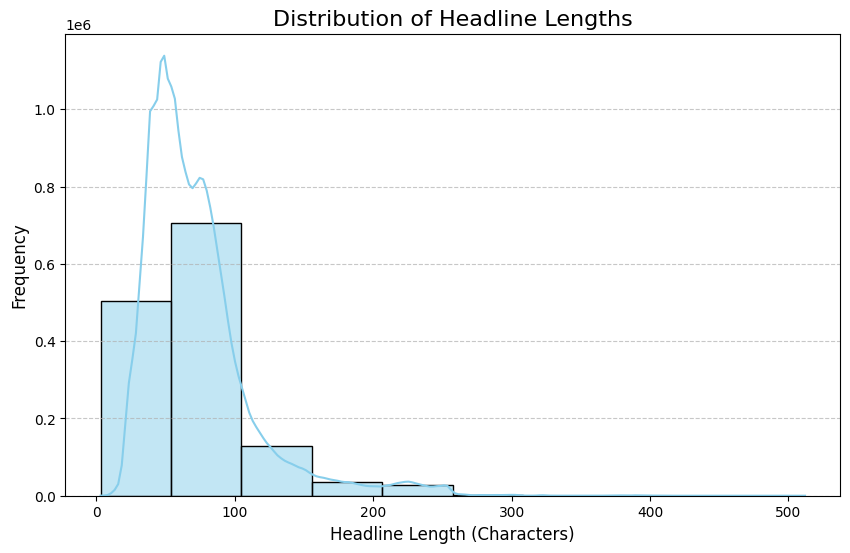

In [50]:
# 1. Visualizing Headline Lengthsl
plt.figure(figsize=(10, 6))
sns.histplot(news_data['headline_length'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Headline Lengths', fontsize=16)
plt.xlabel('Headline Length (Characters)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Article Counts per Publisher

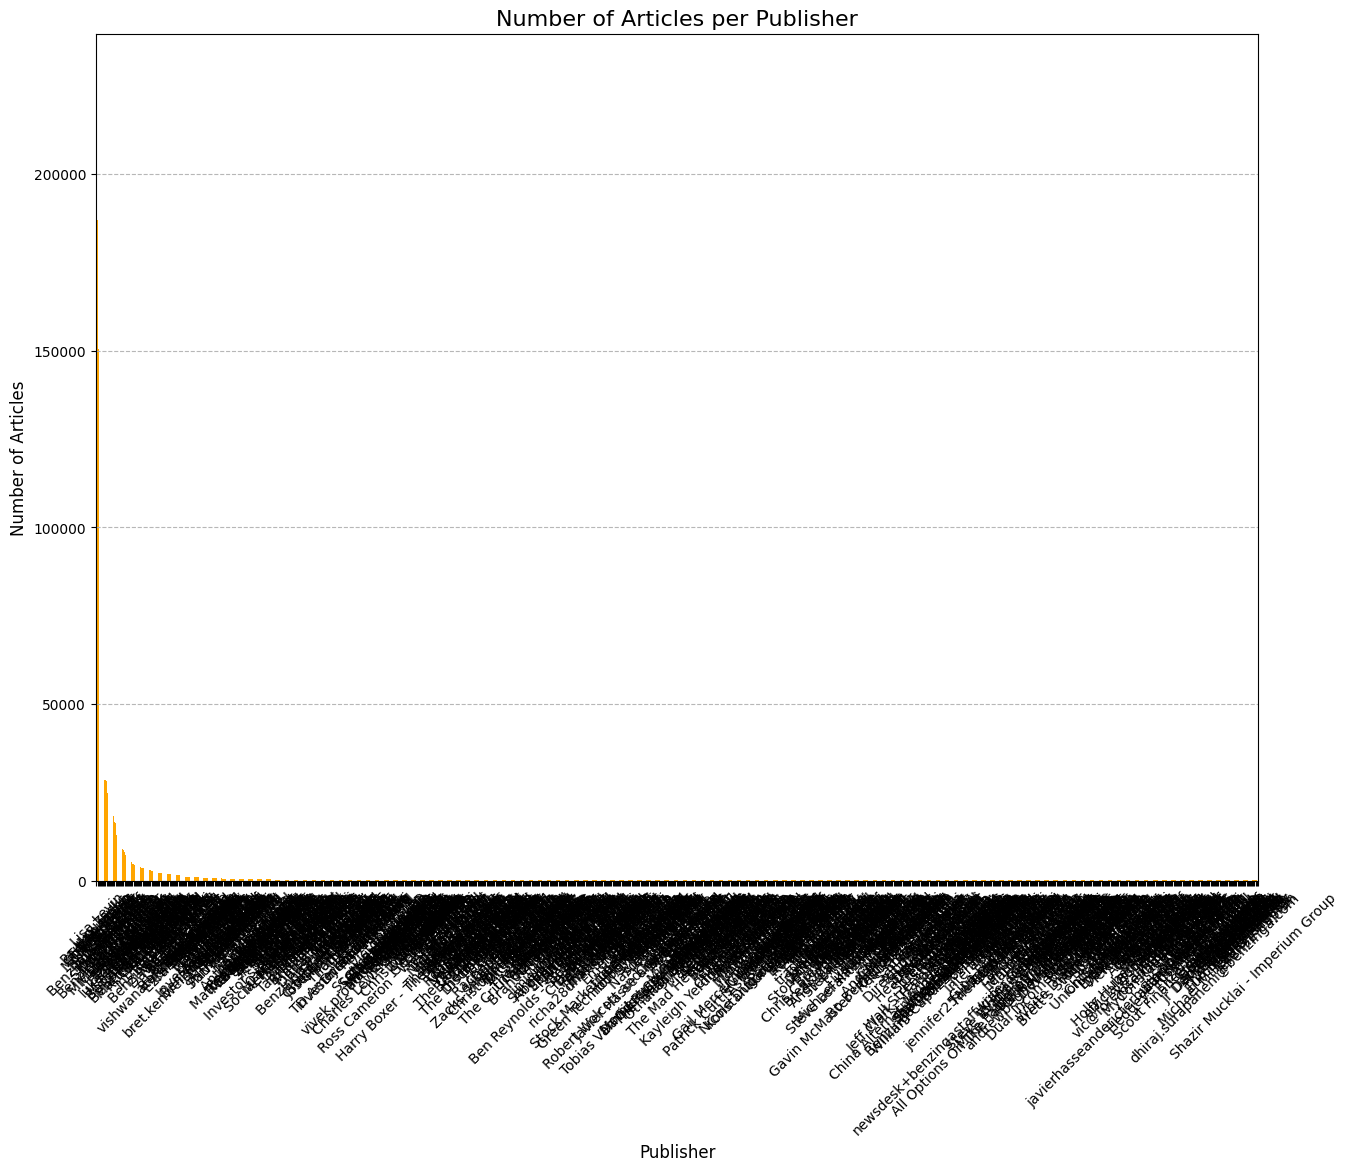

In [53]:
# 2. Visualizing Article Counts per Publisher
plt.figure(figsize=(15, 11))
publisher_counts.plot(kind='bar', color='orange')
plt.title('Number of Articles per Publisher', fontsize=16)
plt.xlabel('Publisher', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()

C:\Users\tesfa\AppData\Local\Temp\ipykernel_68780\2313654122.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publication_trends.index, y=publication_trends.values, palette='viridis')


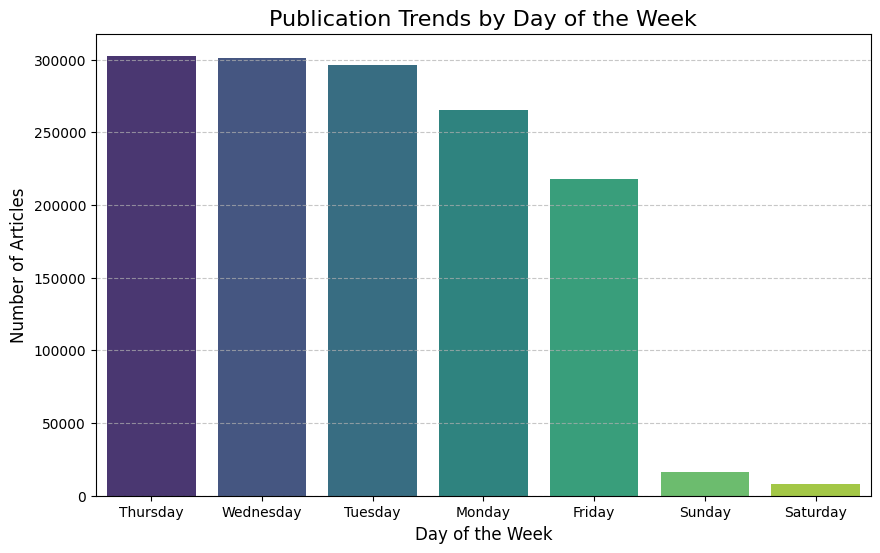

In [56]:
# 3. Visualizing Publication Trends by Day of the Week
plt.figure(figsize=(10, 6))
sns.barplot(x=publication_trends.index, y=publication_trends.values, palette='viridis')
plt.title('Publication Trends by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Articles', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [11]:
from scripts.financial_analyzer import get_sentiment

news_data['sentiment_score'] = news_data['headline'].apply(get_sentiment)

In [12]:
news_data['sentiment_score_word'] = news_data['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('neutral' if x == 0 else 'negative'))

<Axes: xlabel='date'>

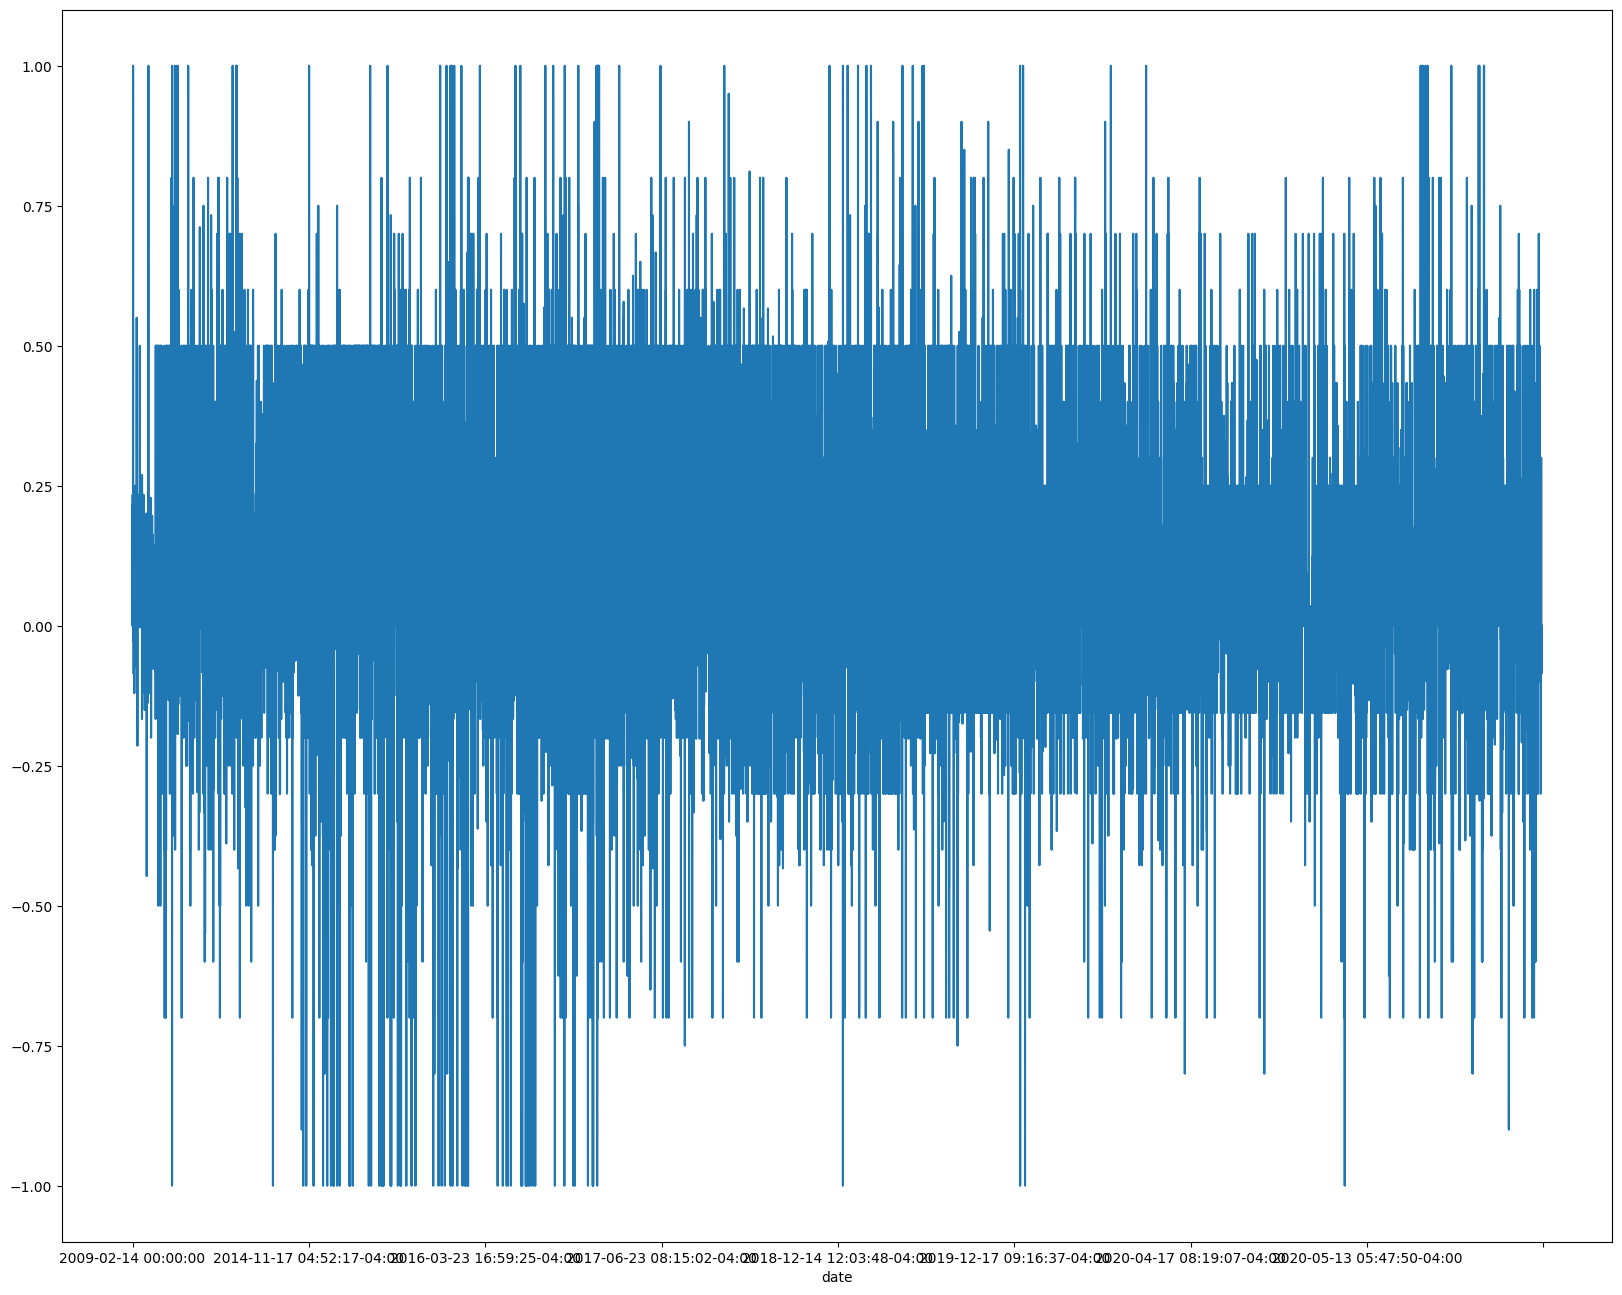

In [11]:
news_data.groupby('date')['sentiment_score'].mean().plot(figsize=(20,16))

Number of Published articles with respect to sentiment categories

In [12]:

numberOfSentimentCategories=news_data['sentiment_score_word'].value_counts()
print(numberOfSentimentCategories)

neutral     934914
positive    341178
negative    131236
Name: sentiment_score_word, dtype: int64


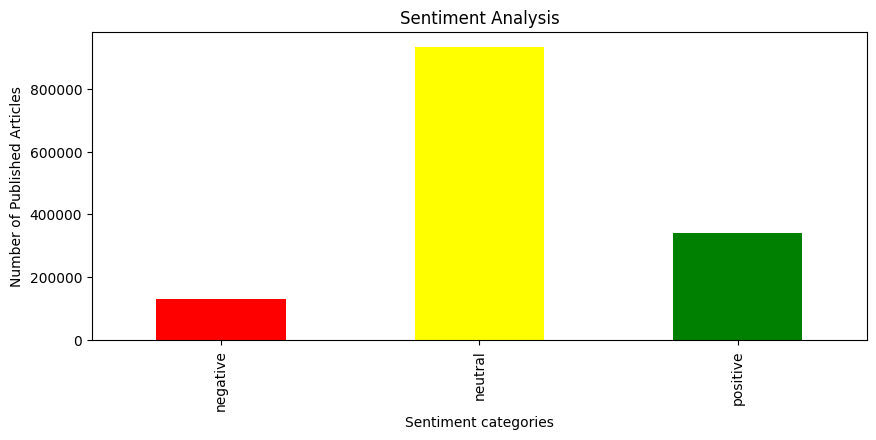

In [13]:
from scripts.financial_analyzer import numberOfArticlesWithSentimentAnalysis
numberOfArticlesWithSentimentAnalysis(news_data)

In [14]:
numberOfSentiment=news_data['sentiment_score_word'].shape
persentOfCategories = np.round((numberOfSentimentCategories/numberOfSentiment)*100,1)
persentOfCategories.head()

neutral     66.4
positive    24.2
negative     9.3
Name: sentiment_score_word, dtype: float64

In [6]:
from scripts.read import read


Time sereias analysis

In [ ]:
# Plot daily publication frequency
plt.figure(figsize=(10, 6))
daily_counts.plot(kind='line', marker='o', color='blue')
plt.title('Publication Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.grid(True)
plt.show()

Publisher Analysis

In [6]:
publisher_counts = news_data['publisher'].value_counts()
publisher_counts.head(20)

Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Vick Meyer            24826
webmaster             20313
Benzinga_Newsdesk     19410
Zacks                 19390
Jayson Derrick        19050
Allie Wickman         18317
Shanthi Rexaline      16640
Craig Jones           16221
Wayne Duggan          12897
Nelson Hem            12590
Name: publisher, dtype: int64

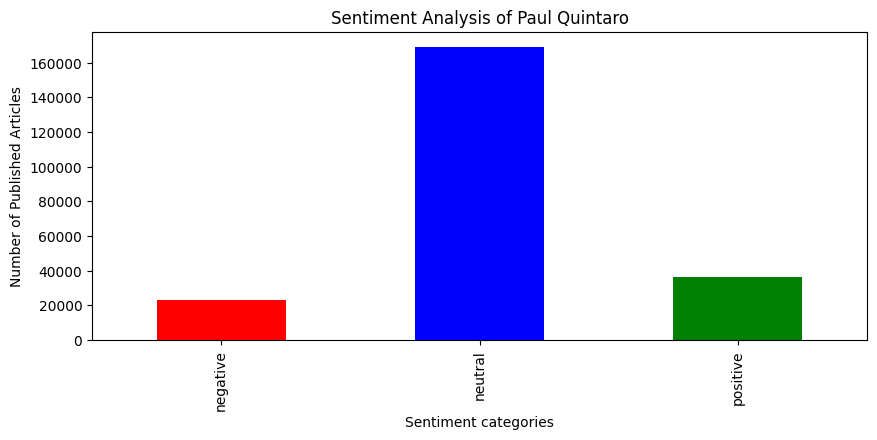

In [13]:
from scripts.financial_analyzer import getSentimentAnalysisOfPublisher
getSentimentAnalysisOfPublisher(news_data,'Paul Quintaro')

C:\Users\tesfa\AppData\Local\Temp\ipykernel_17772\2677569390.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=publisher_counts.values, y=publisher_counts.index, palette="magma")


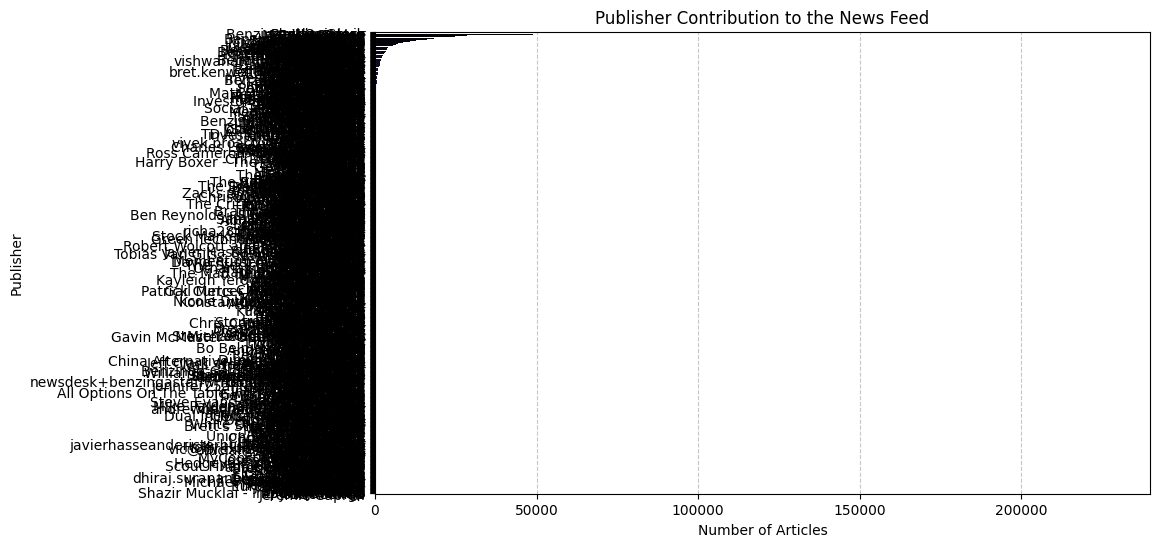

In [20]:
### Publishers Contribution ###
# Count articles per publisher
from matplotlib import pyplot as plt
import seaborn as sns
publisher_counts = news_data['publisher'].value_counts()
# Plot publisher contribution
plt.figure(figsize=(10, 6))
sns.barplot(x=publisher_counts.values, y=publisher_counts.index, palette="magma")
plt.title("Publisher Contribution to the News Feed")
plt.xlabel("Number of Articles")
plt.ylabel("Publisher")
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

In [9]:
news_data.to_csv("../data/processed/news_data.csv", index=False)

In [5]:
from scripts.financial_analyzer import FinancialAnalyzer

In [6]:
  
# Update the paths to be relative to the project root
Apple_df = read('../data/yfinance_data/AAPL_historical_data.csv')
Amazon_df = read('../data/yfinance_data/AMZN_historical_data.csv')
Google_df = read('../data/yfinance_data/GOOG_historical_data.csv')
Meta_df = read('../data/yfinance_data/META_historical_data.csv')
Msft_df = read('../data/yfinance_data/MSFT_historical_data.csv')
Nvidia_df = read('../data/yfinance_data/NVDA_historical_data.csv')
Tesla_df = read('../data/yfinance_data/TSLA_historical_data.csv')
Apple_df.head()





,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [5]:
Google_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0
1,2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0
2,2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0
3,2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0
4,2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0


In [6]:
Amazon_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0


In [7]:
Meta_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2012-12-12,28.000000,28.139999,27.370001,27.580000,27.523441,46704200,0.0,0.0
1,2012-12-13,27.590000,28.750000,27.430000,28.240000,28.182087,81051600,0.0,0.0
2,2012-12-14,28.180000,28.330000,26.760000,26.809999,26.755020,91631600,0.0,0.0
3,2012-12-17,26.770000,27.000000,26.320000,26.750000,26.695143,57742500,0.0,0.0
4,2012-12-18,26.959999,27.910000,26.900000,27.709999,27.653173,60512900,0.0,0.0


In [8]:
Msft_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0


In [9]:
Nvidia_df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0


In [10]:
Tesla_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0


In [11]:
from scripts.financial_analyzer import FinancialAnalyzer

In [7]:
import pandas as pd

Apple_df['Date'] = pd.to_datetime(Apple_df['Date'])
Amazon_df['Date'] = pd.to_datetime(Amazon_df['Date'])
Google_df['Date'] = pd.to_datetime(Google_df['Date'])
Meta_df['Date'] = pd.to_datetime(Meta_df['Date'])
Nvidia_df['Date'] = pd.to_datetime(Nvidia_df['Date'])
Tesla_df['Date'] = pd.to_datetime(Tesla_df['Date'])

In [8]:
Apple = FinancialAnalyzer(Apple_df)
Amazon = FinancialAnalyzer(Amazon_df)
Google = FinancialAnalyzer(Google_df)
Meta = FinancialAnalyzer(Meta_df)
Msft = FinancialAnalyzer(Msft_df)
Nvidia = FinancialAnalyzer(Nvidia_df)
Tesla = FinancialAnalyzer(Tesla_df)

In [10]:
analyzer = FinancialAnalyzer(Apple_df)
analyzer.indicators()


,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA,EMA,RSI,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10993,2024-07-24,224.000000,224.800003,217.130005,218.539993,218.287323,61777600,0.0,0.0,224.228500,222.376929,48.687742,4.662717,-2.016164,6.678882,4.662717,-2.016164,6.678882
10994,2024-07-25,218.929993,220.850006,214.619995,217.490005,217.238556,51391200,0.0,0.0,224.440500,221.911508,47.386437,3.748082,-2.344640,6.092722,3.748082,-2.344640,6.092722
10995,2024-07-26,218.699997,219.490005,216.009995,217.960007,217.708008,41601300,0.0,0.0,224.633500,221.535174,48.055700,3.026267,-2.453164,5.479431,3.026267,-2.453164,5.479431
10996,2024-07-29,216.960007,219.300003,215.750000,218.240005,217.987686,36311800,0.0,0.0,225.014500,221.221349,48.476184,2.448591,-2.424672,4.873263,2.448591,-2.424672,4.873263


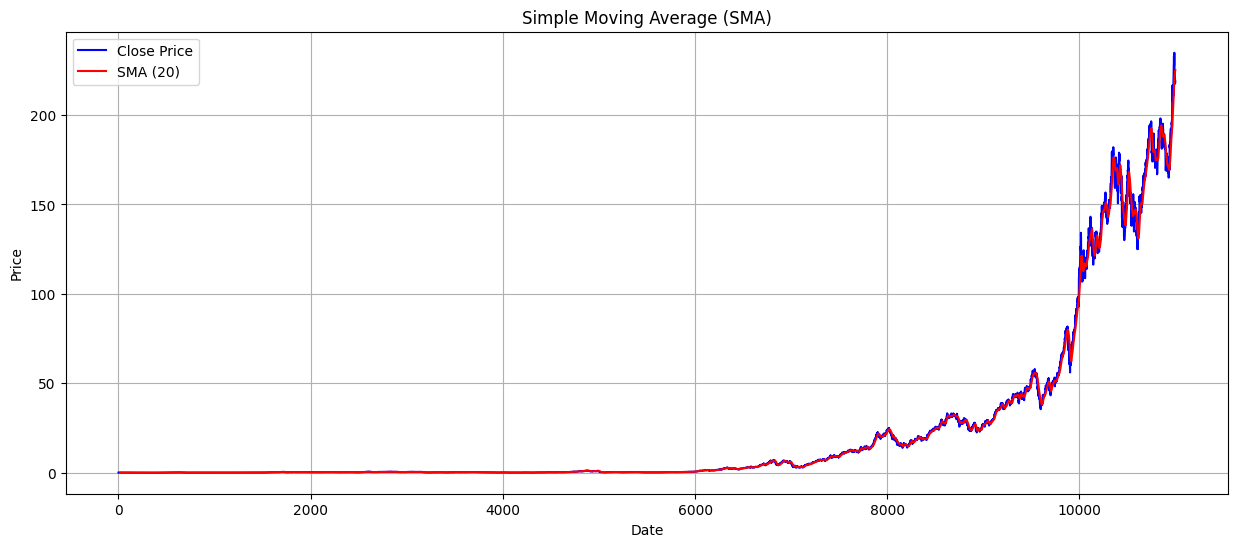

In [13]:
Apple = FinancialAnalyzer(Apple_df)
 # Then plot

Apple.plot_moving_average()
 # Then plot








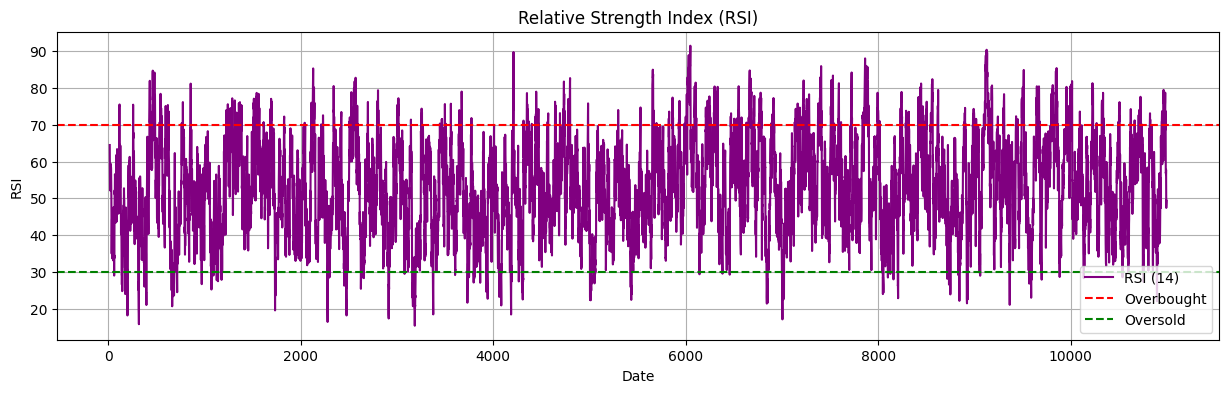

In [16]:
Apple=FinancialAnalyzer(Apple_df)
Apple.plot_rsi()